# EDA for AIS Data

Using Network X

In [36]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib as plt
import random
from importlib import reload 
import nx_tools as nxt
reload(nxt)

<module 'nx_tools' from '/Users/merho/Library/CloudStorage/OneDrive-Personal/Old Documents/Georgetown/DSAN_6400/network_analytics_project/code/nx_tools.py'>

In [46]:
df = pd.read_csv("../data/longer_ais_data.csv")
source_nodes = set(df['vessel_name'].unique())
target_nodes = set(df['fishing_area'].unique())


G = nx.from_pandas_edgelist(df, 'vessel_name', 'fishing_area', edge_attr=['fishing_hours'], create_using=nx.DiGraph())


In [47]:
sub_df = df.sample(n=150)

sub_G = nx.from_pandas_edgelist(sub_df, 'vessel_name', 'fishing_area', edge_attr=['fishing_hours'], create_using=nx.DiGraph())

In [48]:
node_colors = []
for node in sub_G.nodes():
    if node in source_nodes and node in target_nodes:
        node_colors.append('purple') # Node is both source and target
    elif node in source_nodes:
        node_colors.append('red')    # Node is only a source
    elif node in target_nodes:
        node_colors.append('blue')   # Node is only a target
    else:
        node_colors.append('gray')   # Other nodes (if any)

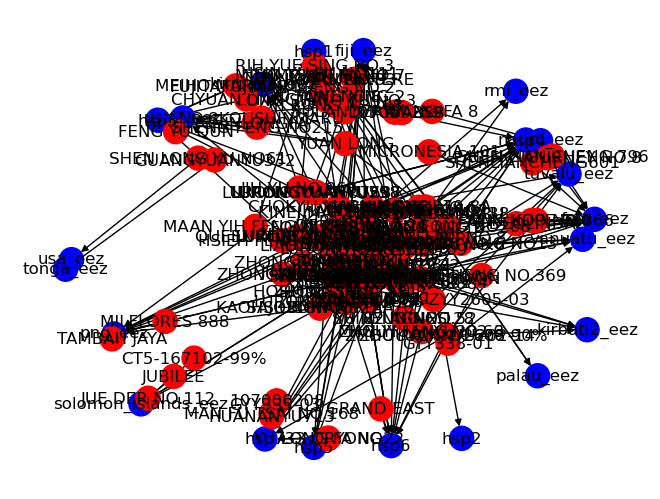

In [51]:
nx.draw(sub_G, 
        with_labels=True, 
        node_color=node_colors, 
        font_color='black', 
        pos = nx.spring_layout(G)
        )